In [1]:
import easyocr
import cv2
import numpy as np
import os
import scipy
import matplotlib.pyplot as plt
from cnocr import CnOcr
from translate import Translator
from PIL import Image, ImageDraw, ImageFont
import textwrap

/Users/allen/anaconda3/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/allen/anaconda3/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: (__ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b)
  Referenced from: '/Users/allen/anaconda3/lib/python3.10/site-packages/torchvision/image.so'
  Expected in: '/Users/allen/anaconda3/lib/python3.10/site-packages/torch/lib/libc10.dylib''If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
ocr = CnOcr() 
reader = easyocr.Reader(['ch_sim','en']) # this needs to run only once to load the model into memory
%matplotlib inline

[WARNING 2023-08-05 10:18:08,458 __init__:74] CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU. 


In [3]:
# EasyOCR
result = reader.readtext('Images/0.jpeg')

temp = []
for x in result:
    if x[2] >= 0.5:
        temp.append(x)
result = temp
print(result)

[([[963, 77], [1241, 77], [1241, 143], [963, 143]], '这破破烂烂', 0.9849294104462797), ([[965, 137], [1239, 137], [1239, 201], [965, 201]], '的东西。老', 0.8091766720186044), ([[963, 193], [1239, 193], [1239, 259], [963, 259]], '怪物还当宝', 0.9800905535489038), ([[965, 250], [1240, 250], [1240, 322], [965, 322]], '贝一样藏着', 0.8918779519603569), ([[1318, 844], [1558, 844], [1558, 916], [1318, 916]], '我倒要看看', 0.981504635266199), ([[1317, 911], [1555, 911], [1555, 979], [1317, 979]], '这玩意藏了', 0.968960442360428), ([[1318, 974], [1534, 974], [1534, 1046], [1318, 1046]], '什么秘密!', 0.9864605743483272)]


In [4]:
# CnOCR
img_fp = 'Images/0.jpeg'

out = ocr.ocr(img_fp)

print(out)

[WARNING 2023-08-05 10:18:26,800 _showwarnmsg:109] /Users/allen/anaconda3/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
 


[{'text': '这破破烂烂', 'score': 0.5290468335151672, 'position': array([[        971,          84],
       [       1235,          84],
       [       1235,         134],
       [        971,         134]], dtype=float32)}, {'text': '的东西，老', 'score': 0.9973063468933105, 'position': array([[        965,         131],
       [       1241,         131],
       [       1241,         203],
       [        965,         203]], dtype=float32)}, {'text': '怪物还当宝', 'score': 0.9971238970756531, 'position': array([[        971,         193],
       [       1236,         200],
       [       1234,         254],
       [        970,         247]], dtype=float32)}, {'text': '贝一样藏着', 'score': 0.9991644620895386, 'position': array([[        968,         257],
       [       1232,         257],
       [       1232,         307],
       [        968,         307]], dtype=float32)}, {'text': '', 'score': 0.10038402676582336, 'position': array([[       1500,         561],
       [       1547,         561],
      

In [5]:
# Combine lines of text that are close enough

def get_dist(x, y):
    return np.sqrt( (x[0]-y[0])**2 + (x[1]-y[1])**2 )

arr = []

for x in result:
    if not arr:
        arr.append(x)
        continue
    
    hasAppend = False
    
    top_left = x[0][0]
    bottom_left = x[0][3]
    for i in range(len(arr)):
        a_bottom_left = arr[i][0][3]
        if get_dist(a_bottom_left, top_left) <= 20:
            arr[i] = ([arr[i][0][0], arr[i][0][1], x[0][2], x[0][3]], arr[i][1] + x[1])
            hasAppend = True
            break
    
    if not hasAppend:
        arr.append(x)
            

print(arr)

[([[963, 77], [1241, 77], [1240, 322], [965, 322]], '这破破烂烂的东西。老怪物还当宝贝一样藏着'), ([[1318, 844], [1558, 844], [1534, 1046], [1318, 1046]], '我倒要看看这玩意藏了什么秘密!')]


In [6]:
# Translates from Chinese to English using Google Translate
translator = Translator(from_lang="zh", to_lang="en")

arr2 = []
for x in arr:
    translation = translator.translate(x[1])
    arr2.append((x[0][0], x[0][1], x[0][2], x[0][3], translation))


print(arr2)

[([963, 77], [1241, 77], [1240, 322], [965, 322], 'This tattered shit. The old monster is still hiding like a baby.'), ([1318, 844], [1558, 844], [1534, 1046], [1318, 1046], 'I want to see what secrets this thing is hiding!')]


(-0.5, 1599.5, 2290.5, -0.5)

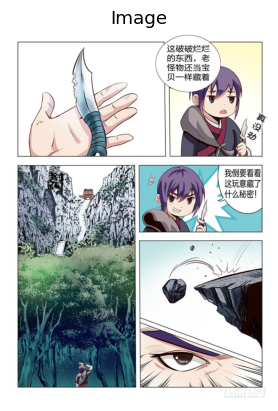

In [7]:
img = cv2.imread("Images/0.jpeg")
colored = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(colored); 
plt.title("Image");
plt.axis('off')

True

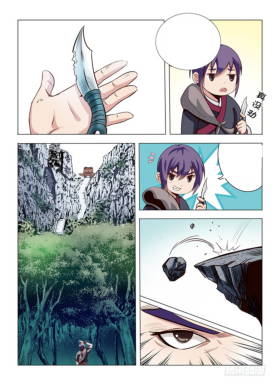

In [8]:
# White Fill
newImage = colored.copy()

for x in result:
    top_left = x[0][0]
    bottom_right = x[0][2]
    cv2.rectangle(newImage, (int(top_left[0]), int(top_left[1])), (int(bottom_right[0]), int(bottom_right[1])), 
                  (255, 255, 255), -1)

plt.imshow(newImage)
plt.axis('off')

# Saves cleaned image
cv2.imwrite("Images/1.jpeg", cv2.cvtColor(newImage, cv2.COLOR_RGB2BGR))

(-0.5, 1599.5, 2290.5, -0.5)

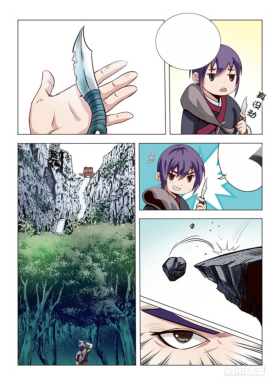

In [9]:
# Content aware fill
height, width, _ = colored.shape

mask = np.zeros((height, width)).astype(np.uint8)

for x in result:
    top_left = x[0][0]
    bottom_right = x[0][2]
    cv2.rectangle(mask, (int(top_left[0]), int(top_left[1])), (int(bottom_right[0]), int(bottom_right[1])), 
                  (1), -1)
    
newImage2 = colored.copy()
dst = cv2.inpaint(newImage2,mask,3,cv2.INPAINT_TELEA)

plt.imshow(dst)
plt.axis('off')

This tattered shit. The old monster is still hiding like a baby.
I want to see what secrets this thing is hiding!


(-0.5, 1599.5, 2290.5, -0.5)

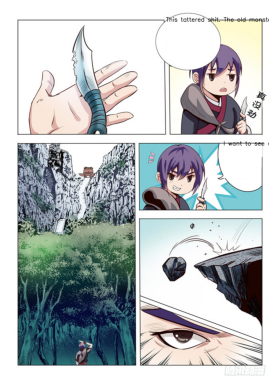

In [10]:
textOverlay = newImage.copy()

for x in arr2:
    print(x[4])
    cv2.putText(textOverlay, x[4], (x[0][0], x[0][1]), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0,0,0), 2)

plt.imshow(textOverlay)
plt.axis('off')

[WARNING 2023-08-05 12:09:55,028 _showwarnmsg:109] /var/folders/s8/xm3_9jws0jq0v8ty2q1n8hdr0000gn/T/ipykernel_2209/463416121.py:16: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(wrapped_text, font=font)
 
[WARNING 2023-08-05 12:09:55,032 _showwarnmsg:109] /var/folders/s8/xm3_9jws0jq0v8ty2q1n8hdr0000gn/T/ipykernel_2209/463416121.py:16: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(wrapped_text, font=font)
 


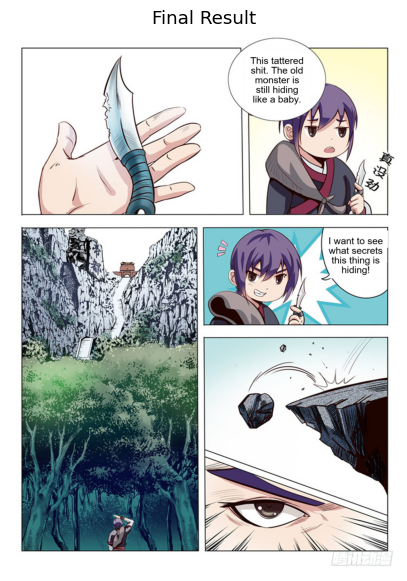

In [13]:
image_path = 'Images/1.jpeg'
image = Image.open(image_path)
font_size = 40
font = ImageFont.truetype("Arial.ttf", font_size)
text_color = (0, 0, 0) 

for x in arr2:
    text_to_place = x[4]

    rect_x, rect_y = x[0][0], x[0][1]  
    rect_width, rect_height = x[2][0]-x[0][0], x[2][1]-x[0][1] 
    draw = ImageDraw.Draw(image)

    wrapped_text = textwrap.fill(text_to_place, width=15) 

    text_width, text_height = draw.textsize(wrapped_text, font=font)

    text_x = rect_x + (rect_width - text_width) // 2
    text_y = rect_y + (rect_height - text_height) // 2

    draw.text((text_x, text_y), wrapped_text, font=font, fill=text_color, align="center")
    
    
fig, ax = plt.subplots(figsize=(5, 7)) 
ax.imshow(image, aspect='auto')  
plt.title("Final Result");
ax.axis('off')
plt.show()


In [17]:
image.save("Images/2.jpeg")